In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Simple linear model

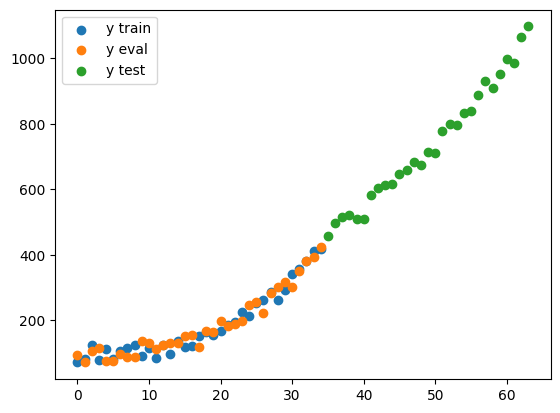

In [545]:
# initiating_data
SET_LEN = 100
NOISE_MULT = 60
NUM_FEATURES = 4
ALPHA = .005

base_feature = np.array(range(0, SET_LEN, 1))

# features are deliberately complicated to check that weights could be adjusted appropriately
# features are scaled to have mean within the same order of magnitude and to avoid gradient explosion
X = np.array([
    base_feature / 25, 
    (base_feature / 25 ) ** 2, 
    (base_feature / 25) ** 3,
    np.ones(len(base_feature)) * 7, 
    # np.log(base_feature + 1)
]).T 
X_tr, X_eval, X_te = X[0 : int(.7 * SET_LEN): 2], X[1 : int(.7 * SET_LEN): 2], X[int(.7 * SET_LEN) + 1 :]

y_noise_tr = (np.random.rand(len(X_tr)) - .5) * NOISE_MULT
y_noise_eval = (np.random.rand(len(X_eval)) - .5) * NOISE_MULT
y_te = (np.random.rand(len(X_te)) - .5) * NOISE_MULT

Y_tr = .001 * base_feature[0 : int(.7 * SET_LEN) : 2] ** 3 + 100 + y_noise_tr
Y_eval = .001 * base_feature[1 : int(.7 * SET_LEN) : 2] ** 3 + 100 + y_noise_eval
Y_te = .001 * base_feature[int(.7 * SET_LEN) + 1 :] ** 3 + 100 + y_te

plt.scatter(range(len(Y_tr)), Y_tr, label='y train')
plt.scatter(range(len(Y_eval)), Y_eval, label='y eval')
plt.scatter(range(len(Y_tr), len(Y_tr) + len(Y_te)), Y_te, label='y test')
plt.legend()

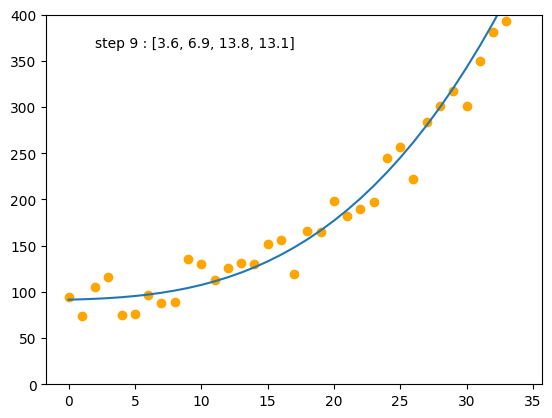

In [546]:
# initiating weights
W = np.random.rand(NUM_FEATURES).reshape(-1, 1)

# learning
for _ in range(10):
    #prediction
    pred_eval = X_eval @ W # prediction on the eval set within the value range of train set
    pred_train = X_tr @ W # predicting on the train set, these predictions are used to adjust weights

    #weight adjustment
    err = pred_train - Y_tr.reshape(-1,1)
    grad = (2 * X_tr.T @ err ) / len(X_tr)
    W -= ALPHA * grad

    clear_output()
    plt.plot(range(len(pred_eval)), pred_eval)
    plt.scatter(range(len(Y_eval)), Y_eval, color='orange')
    plt.ylim(0, 400)
    plt.text(2, 365, f'step {_} : {W.flatten().round(1).tolist()}' )
    plt.show()
    time.sleep(.4)

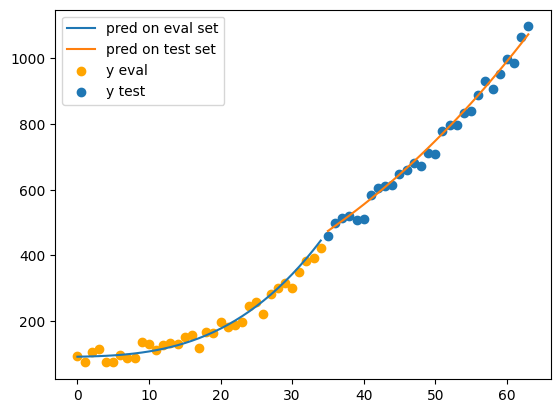

In [547]:
# trying on test set outside of value range of train set
pred_test = X_te @ W

plt.plot(range(len(pred_eval)), pred_eval, label='pred on eval set')
plt.plot(range(len(pred_eval), len(pred_eval) + len(pred_test)), pred_test, label='pred on test set')

plt.scatter(range(len(Y_eval)), Y_eval, color='orange', label='y eval')
plt.scatter(range(len(Y_eval), len(Y_eval) + len(Y_te)), Y_te, label='y test')
plt.legend()


<font size="5"> As we see on the plot above, linear model is able to generalise and predict simple shapes based on values outside the range of the train set. </font>

# Linear model with regularisation